# Unsupervised Learning

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F2_unsupervised_learning.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- 
</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- 
</div>

## Unsupervised learning objective

Contrary to supervised learning, we only have:

- an *input* vector $\boldsymbol{X}$ of $X_1, \ldots, X_p$ input variables with a joint probability distribution $\mathbb{P}(\boldsymbol{X})$.

<hr>

**Supervised Learning Objective**
<br>
Directly infer some properties of $\mathbb{P}(\boldsymbol{X})$ from observations $\boldsymbol{x}_i, i = 1, \ldots N$. 

<hr>

- The dimension $p$ is usually large $\rightarrow$ not possible to directly estimate $\mathbb{P}(\boldsymbol{X})$ (e.g. histogram),
- and there is no direct measure of success,
- but we are not interested in learning how the distribution changes depending (conditioned) on some other variable.

### Curse of dimensionality

Often, the average number of observations $N$ required to capture some structure with a given level of accuracy increases exponentially with the dimension $p$.

For instance, the following example illustrates that, to achieve the same sampling density $\rho$ in a unit hypercube, we must have $N = \rho^p$.

In [19]:
# Imports and configuration for this tutorial
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import panel as pn
pn.extension()

# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Quiver configuration
KWARGS_QUIVER = dict(units='xy', angles='xy', scale_units='xy', scale=1.)

# Matplotlib configuration
plt.rc('font', size=14)

Text(0.5, 0.92, 'p = 3, density = 10, N = 1000')

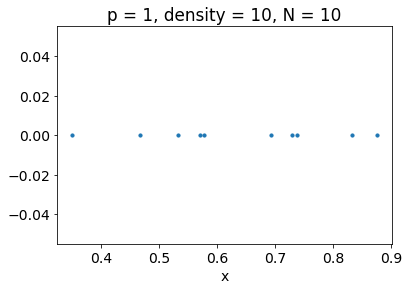

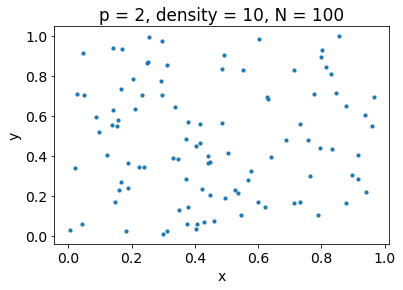

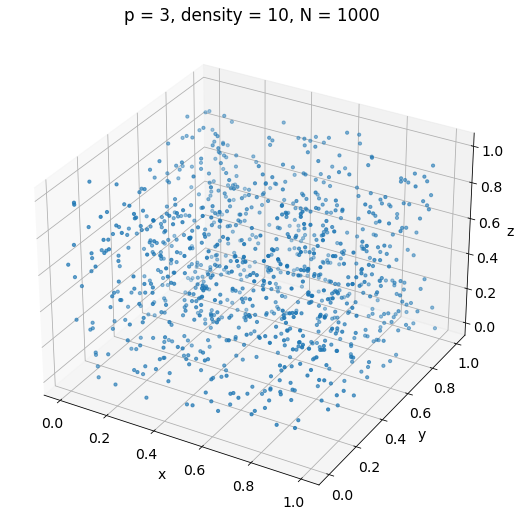

In [2]:
# Number of points per unit hypercube
density = 10

# Get as many observations drawn from a uniform distribution
# as needed to get the given density for of hypercube of dimension p
def get_observations(p, density):
    return np.random.rand(density**p, p)

# Plot configuration
xlim = [0, 1]
markersize = 10

# Plot observations for 1 dimension
p = 1
X = get_observations(p, density)
plt.figure()
plt.scatter(X, np.zeros(X.shape), s=markersize)
plt.xlabel('x')
plt.title('p = {}, density = {}, N = {}'.format(
    p, density, X.shape[0]))

# Plot observations for 2 dimensions
p = 2
X = get_observations(p, density)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=markersize)
plt.xlabel('x')
plt.ylabel('y')
plt.title('p = {}, density = {}, N = {}'.format(
    p, density, X.shape[0]))

# Plot observations for 3 dimensions
p = 3
X = get_observations(p, density)
fig = plt.figure(figsize=[12, 9])
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=markersize)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('p = {}, density = {}, N = {}'.format(
    p, density, X.shape[0]))

## Applications

- Dimension reduction/feature selection/pattern identification (PCA, multidim. scaling, self-organizing maps, principal curves, ...):
  - identify low-dimensional hypersurfaces (manifolds) in $\boldsymbol{X}$-space
  - provide information about associations among variables
  - express input variables as functions of a smaller set of "latent"/"hidden" variables
- Identify modes (local maxima) of $\mathbb{P}(\boldsymbol{X})$ (cluster analysis, mixture modeling)


## Principal Component Analysis



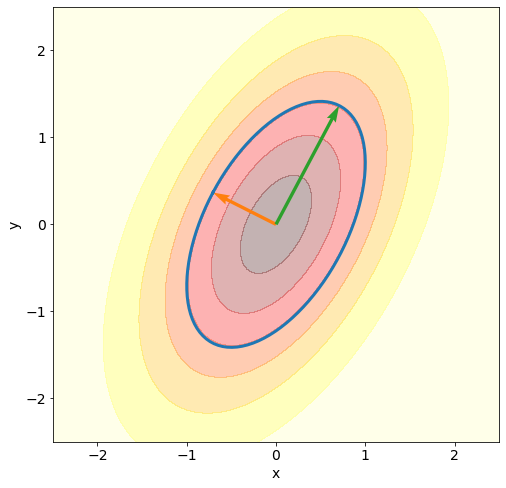

In [53]:
p = 2
xlim = [-2.5, 2.5]

# True mean vector and covariance matrix
mean_true = np.zeros((p,))
var_x = 1.
var_y = 2.
corr_xy = 0.5
cov_xy = corr_xy * np.sqrt(var_x * var_y)
cov_true = np.array([[var_x, cov_xy], [cov_xy, var_y]])

# Numerical approximation of eigenvectors and eigenvalues of covariance matrix
d_true, V_true = np.linalg.eigh(cov_true)
D_true = np.diag(d_true)
VD_true = V_true @ np.sqrt(D_true)

# Distribute points uniformely on ellipse
t = np.linspace(0, 2 * np.pi, 100)
A_ellipse = np.array([np.cos(t), np.sin(t)]).T
X_ellipse = A_ellipse @ np.sqrt(D_true) @ V_true.T

# Get PDF values of multivariate normal distribution on grid using known
# formulas
rv = stats.multivariate_normal(mean_true, cov_true)
slice_grid = slice(*xlim, 0.01)
x_grid, y_grid = np.mgrid[slice_grid, slice_grid]
xy_grid = np.dstack((x_grid, y_grid))
pdf = rv.pdf(xy_grid)

# Plot
plt.figure(figsize=[8, 8])
plt.xlim(xlim)
plt.ylim(xlim)
plt.xlabel('x')
plt.ylabel('y')

# Plot PDF contours
plt.contourf(x_grid, y_grid, pdf, cmap='hot_r', alpha=0.3)

# Plot ellipse with principal axes given by eigenvectors scaled by eigenvalues
plt.plot(*X_ellipse.T, lw=3)

# Plot true eigenvectors scaled by eigenvalues
plt.quiver(mean_true, mean_true, VD_true[0], VD_true[1], color=RC_COLORS[1:3],
           **KWARGS_QUIVER)

Column
    [0] Column
        [0] Button(button_type='primary', name='Resample')
        [1] DiscreteSlider(formatter='%d', name='N', options=[5, 10, 15, 20, ...], value=5)
    [1] Row
        [0] Matplotlib(Figure)
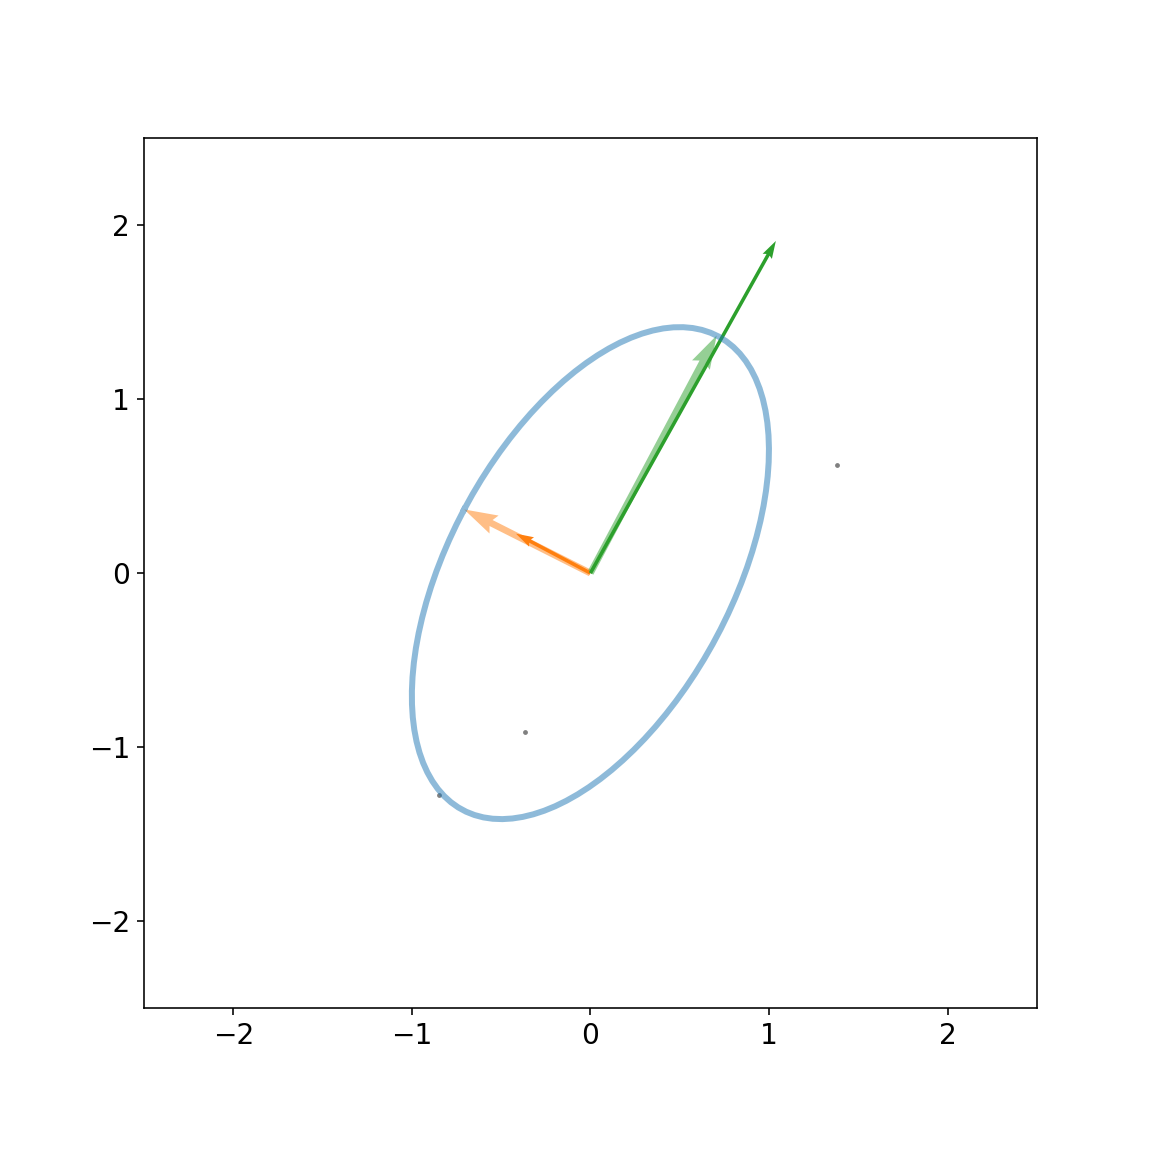

In [52]:
# Plot EOF estimated from a sample of N observations
def plot_eof(b, N=5):
    # Generate train data from multivariate normal distribution
    X_train = np.random.multivariate_normal(mean_true, cov_true, size=N)

    # Estimate covariance matrix from train data
    cov_train = np.cov(X_train.T)

    # Get EOFs
    d_train, V_train = np.linalg.eigh(cov_train)
    D_train = np.diag(d_train)
    VD_train = V_train @ np.sqrt(D_train)

    fig = Figure(figsize=[8, 8])
    ax = fig.subplots()
    ax.set_xlim(xlim)
    ax.set_ylim(xlim)

    # Plot train data
    ax.scatter(*X_train.T, s=2, c='0.5')

    # Plot ellipse with principal axes given by eigenvectors scaled by eigenvalues
    ax.plot(*X_ellipse.T, alpha=0.5, lw=3)

    # Plot true eigenvectors scaled by eigenvalues
    ax.quiver(mean_true, mean_true, VD_true[0], VD_true[1],
              color=RC_COLORS[1:3], alpha=0.5, **KWARGS_QUIVER)

    # Plot EOFs scaled by eigenvalue estimates
    ax.quiver(mean_true, mean_true, VD_train[0], VD_train[1],
              color=RC_COLORS[1:3], width=0.02, **KWARGS_QUIVER)
    
    return pn.pane.Matplotlib(fig)

button = pn.widgets.Button(name='Resample', button_type='primary')
pn.interact(plot_eof, b=button, N=np.arange(5, 510, 5))

Column
    [0] Column
        [0] Button(button_type='primary', name='Resample')
        [1] DiscreteSlider(formatter='%d', name='N', options=[10, 20, 30, 40, ...], value=100)
        [2] IntSlider(end=6, name='degree', start=-2, value=2)
    [1] Row
        [0] Matplotlib(Figure)
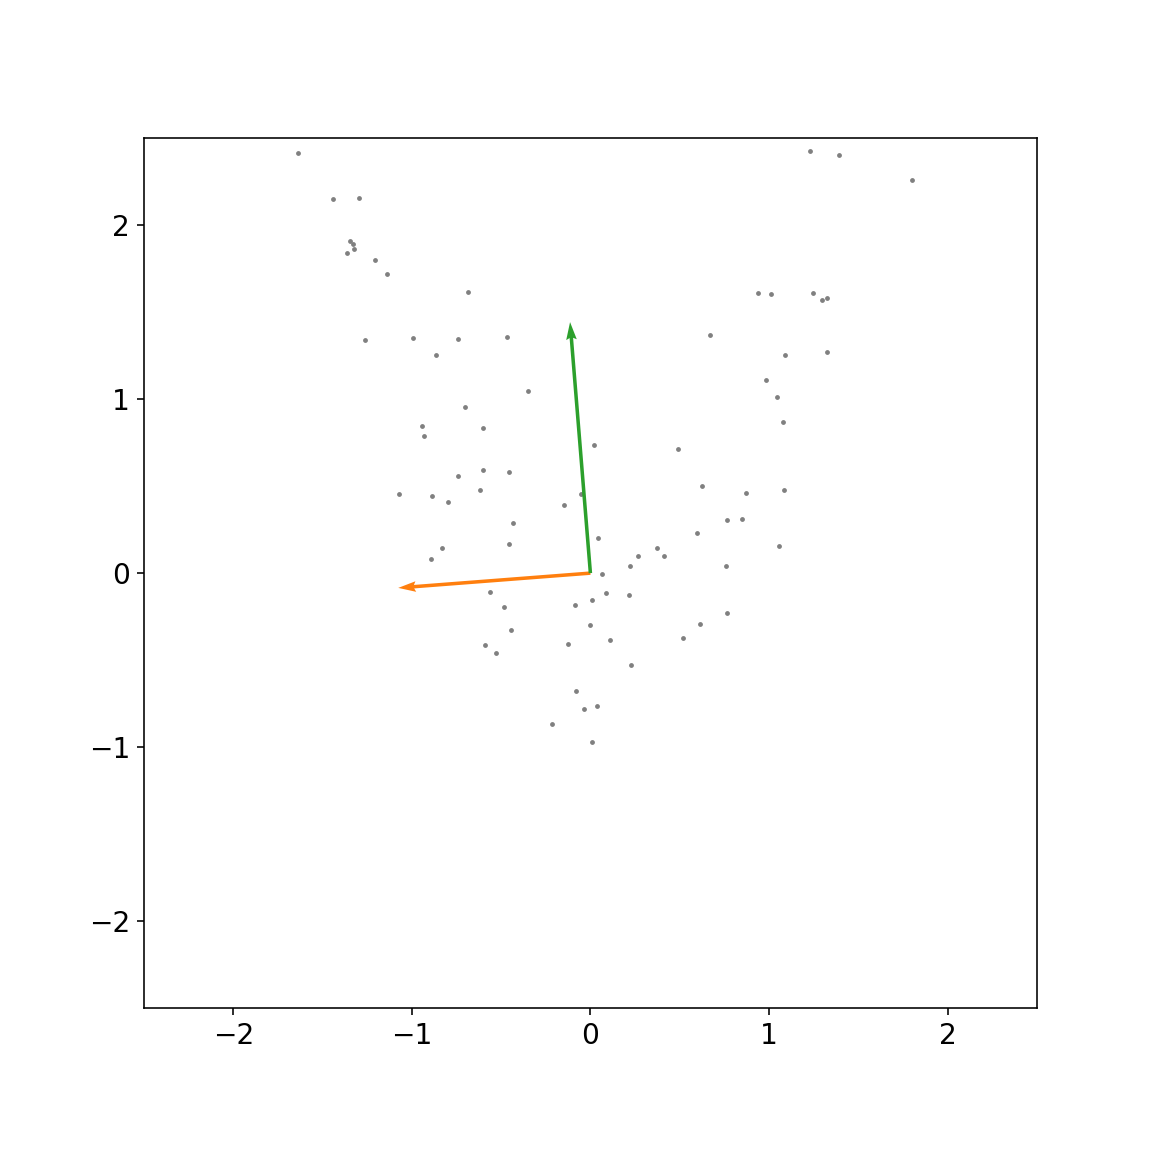

In [57]:
# Plot EOF estimated from a sample of N observations
def plot_eof(b, N=100, degree=2):
    # Generate train data from multivariate normal distribution
    x_train = np.random.randn(N)
    y_train = x_train**degree + np.random.randn(N) * 0.5
    X_train = np.array([x_train, y_train]).T

    # Estimate covariance matrix from train data
    cov_train = np.cov(X_train.T)

    # Get EOFs
    d_train, V_train = np.linalg.eigh(cov_train)
    D_train = np.diag(d_train)
    VD_train = V_train @ np.sqrt(D_train)

    fig = Figure(figsize=[8, 8])
    ax = fig.subplots()
    ax.set_xlim(xlim)
    ax.set_ylim(xlim)

    # Plot train data
    ax.scatter(*X_train.T, s=2, c='0.5')

    # Plot EOFs scaled by eigenvalue estimates
    ax.quiver(mean_true, mean_true, VD_train[0], VD_train[1],
              color=RC_COLORS[1:3], width=0.02, **KWARGS_QUIVER)
    
    return pn.pane.Matplotlib(fig)

button = pn.widgets.Button(name='Resample', button_type='primary')
pn.interact(plot_eof, b=button, N=np.arange(10, 510, 10))